In [9]:
from glob import glob
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "images"
extension = "jpg"

files = os.listdir(path)
files = sorted(files)
dates = [datetime.datetime.strptime(s.split(f'.{extension}')[0], '%Y-%m-%dT%H-%M-%S.%f') for s in files]

In [3]:
data = pd.DataFrame(dates, columns=["date"])

data["acquisition time"] = data.date.diff(1)
data["acquisition time (s)"] = data["acquisition time"].apply(lambda x: x.total_seconds())

<AxesSubplot: xlabel='acquisition time (s)', ylabel='Count'>

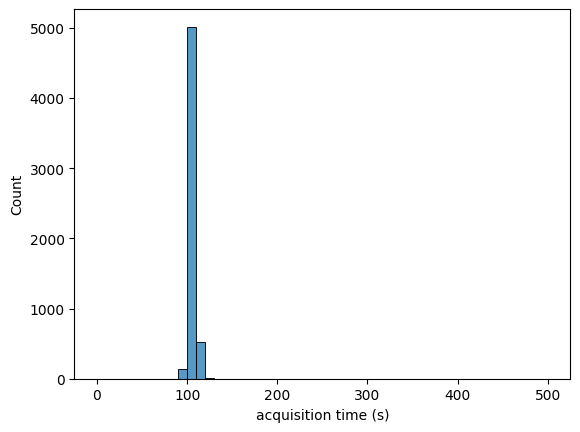

In [11]:
sns.histplot(data=data, x="acquisition time (s)", bins=50, binrange=[0, 500])

In [5]:
data.head()

,date,acquisition time,acquisition time (s)
0,2021-05-01 00:02:58.359379,NaT,NaN
1,2021-05-01 00:04:45.535865,0 days 00:01:47.176486,107.176486
2,2021-05-01 00:06:36.601346,0 days 00:01:51.065481,111.065481
3,2021-05-01 00:08:23.041047,0 days 00:01:46.439701,106.439701
4,2021-05-01 00:10:06.913165,0 days 00:01:43.872118,103.872118


<AxesSubplot: xlabel='acquisition time (s)'>

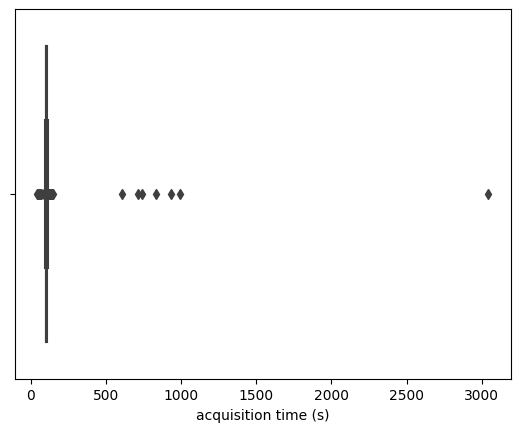

In [6]:
sns.boxplot(data=data, x="acquisition time (s)")

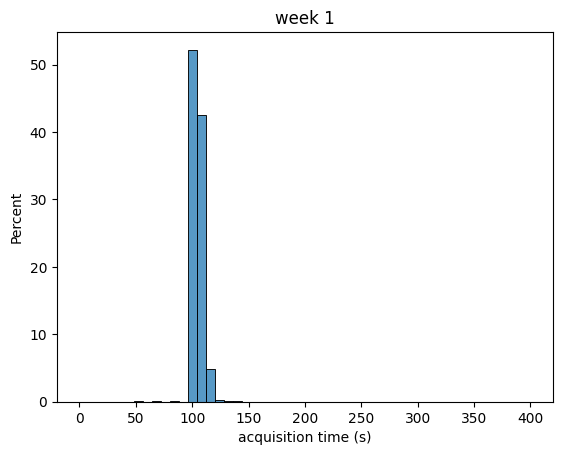

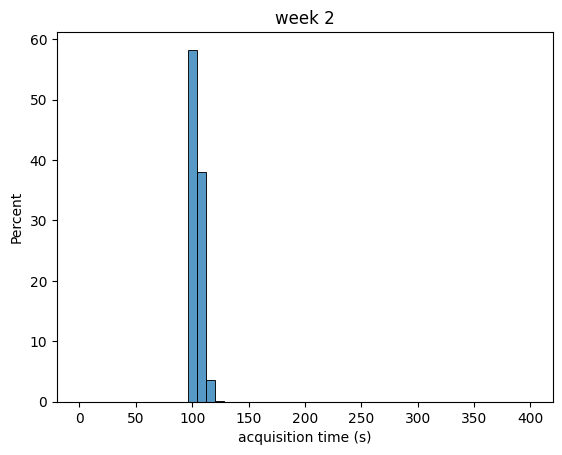

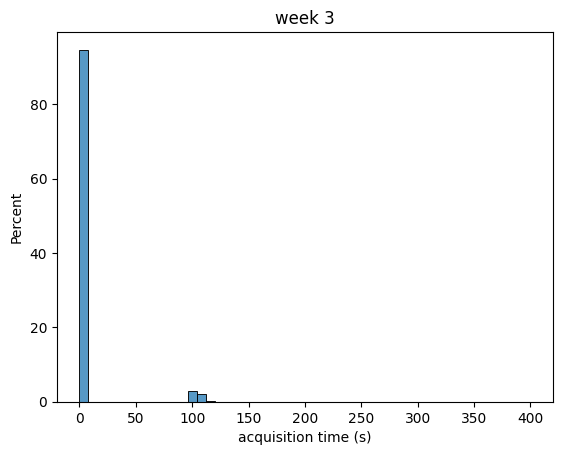

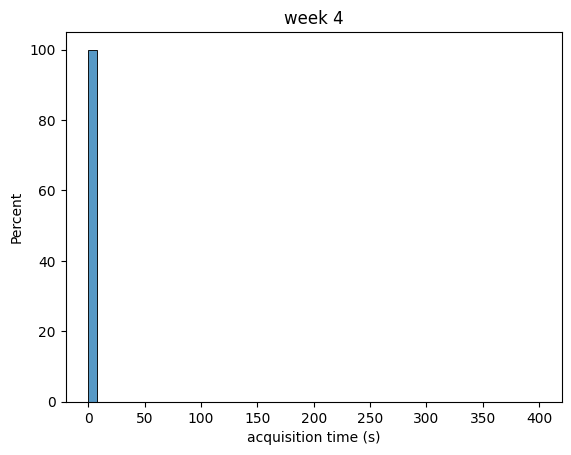

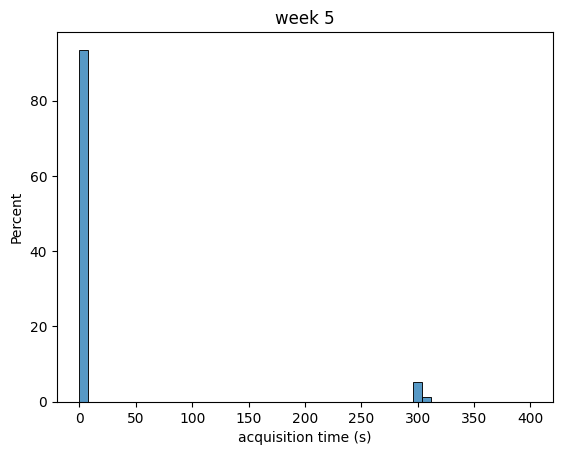

In [16]:
extension = "jpg"

for i in range(1, 6):
    path = f"week{i}/images"
    files = sorted(os.listdir(path))
    dates = [datetime.datetime.strptime(s.split(f'.{extension}')[0], '%Y-%m-%dT%H-%M-%S.%f') for s in files]
    data = pd.DataFrame(dates, columns=["date"])

    data["acquisition time"] = data.date.diff(1)
    data["acquisition time (s)"] = data["acquisition time"].apply(lambda x: x.total_seconds())
    
    sns.histplot(data=data, x="acquisition time (s)", bins=50, binrange=[0, 400], stat="percent")
    plt.title(f"week {i}")
    plt.show()